In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [19]:
#A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. 
#Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

lamb = 2
drive_up = stats.poisson(lamb)
drive_up


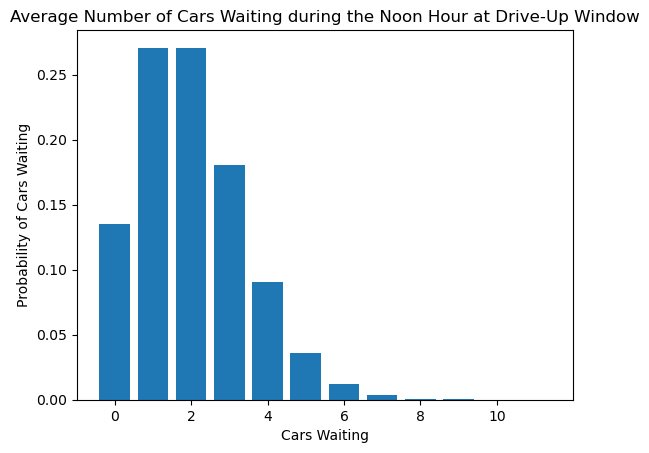

In [24]:
x = np.arange(0, 12)
y = [drive_up.pmf(i) for i in x]

plt.bar(x,y)

plt.xlabel('Cars Waiting')
plt.ylabel('Probability of Cars Waiting')
plt.title('Average Number of Cars Waiting during the Noon Hour at Drive-Up Window')

plt.show()

In [2]:
#What is the probability that no cars drive up in the noon hour?
stats.poisson(2).pmf(0)

0.1353352832366127

In [6]:
#What is the probability that 3 or more cars come through the drive through?
stats.poisson(2).sf(2)

0.32332358381693654

In [7]:
#How likely is it that the drive through gets at least 1 car?
stats.poisson(2).sf(0)

0.8646647167633873

In [8]:
#Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

mean = 3.0
sd = .3


In [11]:

gpa = stats.norm(mean, sd)
gpa

In [34]:
#What grade point average is required to be in the top 5% of the graduating class?

gpa.isf(.05)

3.4934560880854417

In [12]:
#What GPA constitutes the bottom 15% of the class?

gpa.ppf(.15)

2.689069983151863

In [13]:
#An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
#Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

gpa.ppf(.30)
#Yes they would qualify

2.842679846187588

In [ ]:
#If I have a GPA of 3.5, what percentile am I in?


In [14]:
gpa.sf(3.5)

0.0477903522728147

In [61]:
#A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. 
#How likely is it that this many people or more click through?

n_trials = 4326
p= .02
click_throughs = stats.binom(n_trials, p)


#This is asking for a probability of 4326 visitors and 97 click-throughs or more. Sounds exclusive, like it wants the survival function

click_throughs.sf(96)



0.13975823631416448

In [62]:
clicks= np.random.choice([0,1], (10_000, 4326), p = [.98,.02])
clicks

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
(clicks.sum(axis=1) >96).mean()

0.1516

In [64]:
#You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. 
#Looking to save time, you put down random probabilities as the answer to each question.

#What we know

n = 60 #First 60 questions/trials
p = 0.01 #1/100 b'c it's some random number between 0 & 1

stats_hmwk = stats.binom(n, p)

In [66]:
#What is the probability that at least one of your first 60 answers is correct?

stats_hmwk.sf(0)

0.45284335760923855

In [67]:
#The codeup staff tends to get upset when the student break area is not cleaned up. 
#Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active 
#cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without 
#getting cleaned up? All week?

#What we know:
# 90% (0.9) of the 3, 22 student classes visit the break rm
#3% (0.03) chance they'll clean it

#number of students that visit break area
n_students = round(.9 * 22 * 3)

#probability of success
p= .03

In [69]:
#"sf(0)" because we want it cleaned more then 0 times
clean = stats.binom(n_students, p)
clean.sf(0)


0.8342199288437352

In [71]:
#How likely is it that it goes two days without 
#getting cleaned up?

# This means the number of possible students avail to clean has doubled!
n = n_students * 2 
p = 0.03
notclean_2 = stats.binom(n, p)

notclean_2.pmf(0)


0.027483031992576134

In [73]:
print(f"It is {round(notclean_2.pmf(0),3)*100}% likely that the breakroom goes two days without cleaning.")

It is 2.7% likely that the breakroom goes two days without cleaning.


In [75]:
#All week?

n = n_students * 5 
p = 0.03
notclean_5 = stats.binom(n, p)

In [76]:
notclean_5.pmf(0)

0.00012521651388091245

In [77]:
print(f"It is {round(notclean_5.pmf(0),5)*100}% likely that the breakroom goes five days without cleaning.")

It is 0.013% likely that the breakroom goes five days without cleaning.


In [4]:
#You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, 
#you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
#If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes 
#left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

μ = 15 * 2 
σ = 3 * 2

total_lunch_time = 60 #mins
eat_time = 15 #mins
order_time = 2 #mins
cook_time = 10 #mins

max_wait = (total_lunch_time - eat_time) - order_time  - cook_time
max_wait

33

In [79]:
stats.norm(μ, σ).cdf(max_wait)

0.6914624612740131

In [80]:
print(f"There is a {round(stats.norm(μ, σ).cdf(max_wait), 3)*100}% chance you would have at least 15 minutes remaining to eat.")

There is a 69.1% chance you would have at least 15 minutes remaining to eat.


In [13]:
from pydataset import data
import env

In [15]:
url = env.get_db_url('employees')
salaries = pd.read_sql('SELECT * FROM salaries where to_date >now()', url)

In [16]:
μ = salaries.salary.mean()
σ = salaries.salary.std()

In [17]:
#What percent of employees earn less than 60,000?

stats.norm(μ, σ).cdf(60000)

0.24385742480214434

In [18]:
#What percent of employees earn more than 95,000?

stats.norm(μ, σ).sf(95000)

0.09208819199804058

In [19]:
#What percent of employees earn between 65,000 and 80,000?

(stats.norm(μ, σ).cdf(80000)) - (stats.norm(μ, σ).cdf(65000))

0.33506056854466654

In [22]:
#What do the top 5% of employees make?

stats.norm(μ, σ).ppf(.95)

100484.64454102775